In [1]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
from tqdm import tqdm

In [110]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [118]:
subway = pd.read_csv('Subways.csv')
school = pd.read_csv('./Schools.csv')

In [4]:
train.head(5)

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000


In [5]:
train.dtypes

key                                     int64
apartment_id                            int64
city                                    int64
transaction_year_month                  int64
transaction_date                       object
year_of_completion                      int64
exclusive_use_area                    float64
floor                                   int64
latitude                              float64
longitude                             float64
address_by_law                          int64
total_parking_capacity_in_site        float64
total_household_count_in_sites          int64
apartment_building_count_in_sites       int64
tallest_building_in_sites             float64
lowest_building_in_sites              float64
heat_type                              object
heat_fuel                              object
room_id                                 int64
supply_area                           float64
total_household_count_of_area_type      int64
room_count                        

In [191]:
cols = train.columns
print(cols)

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'transaction_real_price'],
      dtype='object')


In [11]:
import seaborn as sns
%matplotlib inline

see how 'transaction_year_month' related to price 

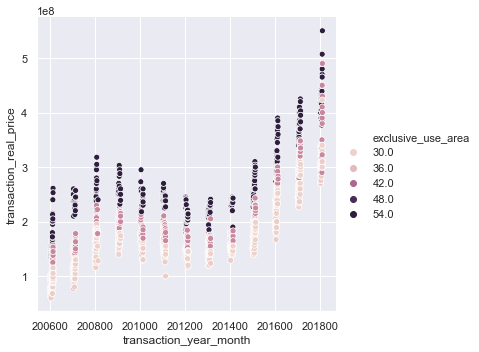

In [193]:
apt = list(set(train['apartment_id']))
tmp = train[train['apartment_id'] == apt[151]]
sns.relplot(x="transaction_year_month", y="transaction_real_price",hue="exclusive_use_area", data=tmp);

In [194]:
train[train['apartment_id'] == apt[151]].count()

key                                   1747
apartment_id                          1747
city                                  1747
transaction_year_month                1747
transaction_date                      1747
year_of_completion                    1747
exclusive_use_area                    1747
floor                                 1747
latitude                              1747
longitude                             1747
address_by_law                        1747
total_parking_capacity_in_site        1747
total_household_count_in_sites        1747
apartment_building_count_in_sites     1747
tallest_building_in_sites             1747
lowest_building_in_sites              1747
heat_type                             1747
heat_fuel                             1747
room_id                               1747
supply_area                           1747
total_household_count_of_area_type    1747
room_count                            1747
bathroom_count                        1747
front_door_

In [195]:
apt_test = list(set(test['apartment_id']))
for i in apt:
    try:
        apt_test.index(i)
    except:
        print(i,"is not in test data set")
        
for i in apt_test:
    try:
        apt.index(i)
    except:
        print(i,"is not in train data set")

33373 is not in train data set
26553 is not in train data set
36224 is not in train data set
36841 is not in train data set
37086 is not in train data set
37180 is not in train data set
37297 is not in train data set
37353 is not in train data set
37354 is not in train data set
37431 is not in train data set
38465 is not in train data set
22247 is not in train data set


In [196]:
test[test.apartment_id==33373]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
254,1560160,33373,1,201805,1~10,2016,74.97,9,37.50619,126.83466,...,14.0,district,cogeneration,92068,110.37,68,3.0,2.0,stairway,0


In [197]:
trans_ym = list(set(train['transaction_year_month']))
trans_ym.sort()
print(trans_ym[0],trans_ym[-1])

200601 201810


data contain 2006.01 ~ 2018.10 transcation info.

final goal is to make prediction model. however, most of prediction model need normalization I decide to normalized transcation_year_month data b/c, its too big compared to other parameters.

In [198]:
train['transaction_year_month'] = [trans_ym.index(i) for i in train['transaction_year_month']]
train['transaction_year_month']
train['transaction_year_month'].head()

0    0
1    0
2    0
3    0
4    0
Name: transaction_year_month, dtype: int64

for 'transaction_date' I decide to group by following rules see below python dictionary

In [199]:
trans_date = {'1~10':0,'11~20':1,'21~28':2, '21~29':2,'21~30':2, '21~31':2}
train['transaction_date'] = [trans_date[i] for i in train['transaction_date']]

In [200]:
tdate = [int(str(trans_ym[i])+str(j)) for i,j in zip(train['transaction_year_month'],train['transaction_date'])]
tdate.sort()
tdate = pd.DataFrame({'tdate': tdate})
train = pd.concat([train, tdate], axis=1)
train['tdate'].sample(n=5)

1147219    2015100
136334     2006120
1593315    2018082
733477     2012121
1588321    2018081
Name: tdate, dtype: int64

In [201]:
train.drop(['transaction_year_month','transaction_date'],axis=1,inplace=True)
td = list(set(train['tdate']))
td.sort()
train['tdate'] = [td.index(i) for i in train['tdate']]
train.sample(n=5)

,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,...,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,tdate
499238,499239,3609,0,1999,84.960,6,35.166234,129.139902,2635010500,1992.0,...,individual,gas,30601,108.19,920,3.0,2.0,stairway,287500000,155
37263,37263,4139,1,1989,83.660,2,37.497279,126.908745,1156013200,477.0,...,individual,gas,7393,100.85,218,3.0,1.0,stairway,267000000,10
1150594,1150601,6022,1,2003,59.990,13,37.605839,127.020249,1129013400,1306.0,...,individual,gas,9550,78.45,452,3.0,1.0,stairway,400000000,352
1485419,1485457,1568,0,1979,60.830,2,35.143963,129.114370,2650010500,3240.0,...,central,gas,26449,83.12,504,3.0,1.0,corridor,415000000,426
812792,812794,5848,1,2002,79.777,2,37.511852,126.902370,1156010100,2554.0,...,individual,gas,9208,109.80,901,3.0,2.0,stairway,380000000,277


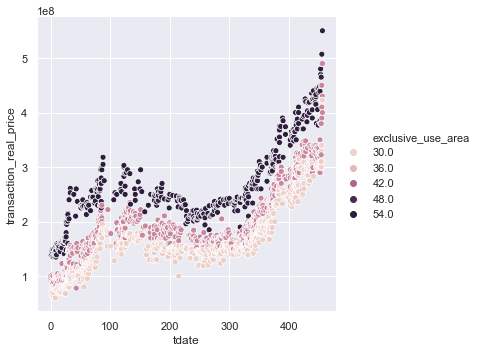

In [202]:
tmp = train[train['apartment_id'] == apt[151]]
sns.relplot(x="tdate", y="transaction_real_price",hue="exclusive_use_area", data=tmp);

date preprocessing is done, lets see relation between year_of_completion and transaction_real_price

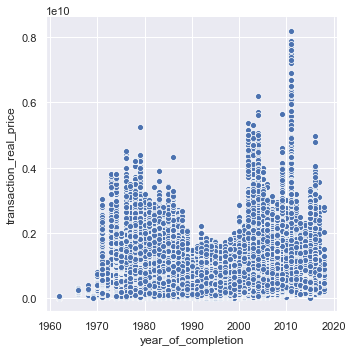

In [203]:
sns.relplot(x="year_of_completion", y="transaction_real_price", data=train);

In [204]:
loc = []
for lt,lg in zip(train['latitude'],train['longitude']):
    loc.append((lt,lg))
loc = list(set(loc))

In [205]:
def loc2df(a):
    i,j = a
    return train[(train.latitude==i).astype(bool) & (train.latitude==i).astype(bool)]
def aptid2df(a):
    return train[train.apartment_id == a]

latitude and longtitude scale 

35.04879 ~ 37.68763

126.8061 ~ 129.2376

In [206]:
m = []
x = []
y = []
for i in loc:
    a,b = i
    x.append(a)
    y.append(b)
    m.append(loc2df(i)['transaction_real_price'].mean())

price by latitude and longitude

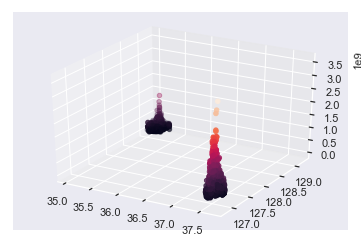

In [207]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, m, c=m);

see 3D scatter plot above, near (37.5,127.5) indicate seoul and the other cluster near (35,129) busan

let's see transaction on seoul not busan,seoul combined

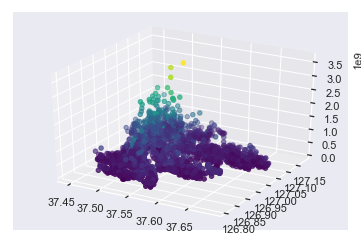

In [208]:
m = []
x = []
y = []
for i in loc:
    a,b = i
    if(a<36.5):
        continue
    x.append(a)
    y.append(b)
    m.append(loc2df(i)['transaction_real_price'].mean())
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, m, c=m,cmap='viridis');

encode address by law 

In [209]:
# there are 377 address_by_law
address_by_law_lookup = list(set(train['address_by_law']))
address_by_law_lookup.sort()

train['address_by_law'] = [address_by_law_lookup.index(i) for i in train.address_by_law]
train['address_by_law'].head()

0    5
1    5
2    6
3    6
4    6
Name: address_by_law, dtype: int64

I wonder incidental thing like parking area, household in site etc.. influence the real price of the apt.

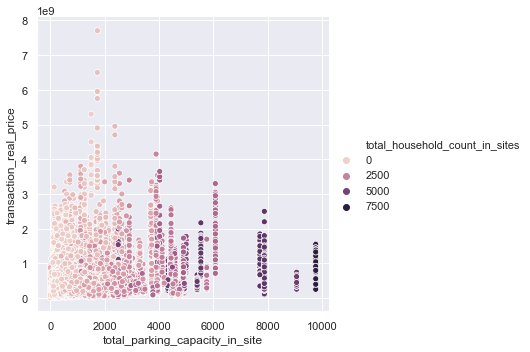

In [210]:
#parking
sns.relplot(x="total_parking_capacity_in_site", y="transaction_real_price",hue="total_household_count_in_sites", data=train.sample(n=100000));

In [211]:
tmp = train[['total_parking_capacity_in_site','transaction_real_price']]
tmp['total_parking_capacity_in_site'] /= train['total_household_count_in_sites']
tmp.rename(columns={'total_parking_capacity_in_site':'parkingPERhousehold'}, inplace=True)
tmp.head(5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,parkingPERhousehold,transaction_real_price
0,1.198529,215000000
1,1.198529,200000000
2,1.541880,168000000
3,0.981502,165000000
4,0.981502,280000000


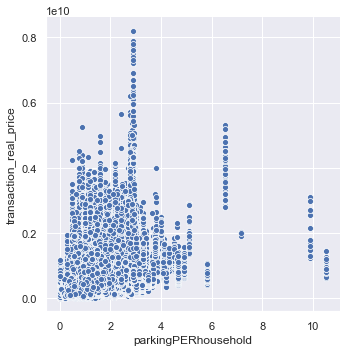

In [212]:
sns.relplot(x="parkingPERhousehold", y="transaction_real_price", data=tmp);

As you can see in the graph above, some apartment has low price even if household occupies many capacity of parking.
so lets look the data of more than 5 of parkingPERhousehold

In [213]:
many_park = train[train.total_parking_capacity_in_site/train.total_household_count_in_sites >5]['apartment_id']
many_park = set(many_park)
many_park

{3729, 10267, 17023, 19045, 19222, 37242}

In [214]:
a = []
for i in list(many_park):
    print(train[train.apartment_id == i][['latitude','longitude']][:1],'\n','='*30)

         latitude   longitude
552282  37.601823  127.040446 
        latitude   longitude
15336  37.494132  127.026244 
         latitude  longitude
670043  37.545784  127.04248 
          latitude   longitude
1503555  37.527473  126.965218 
        latitude   longitude
30443  37.560949  126.968128 
         latitude   longitude
398975  37.544931  126.950595 


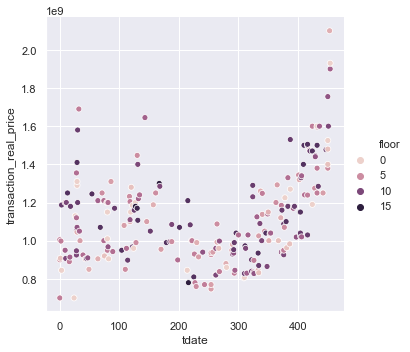

In [215]:
tmp = train[train.apartment_id== 90]
sns.relplot(x="tdate", y="transaction_real_price",hue="floor", data=tmp);

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


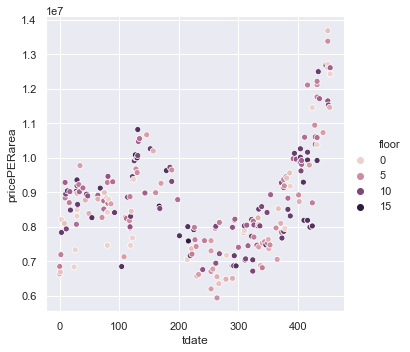

In [216]:
tmp['pricePERarea'] = tmp['transaction_real_price']/tmp['exclusive_use_area']
sns.relplot(x="tdate", y="pricePERarea",hue="floor", data=tmp);

floor doesn't seems like affecting the price of apartment

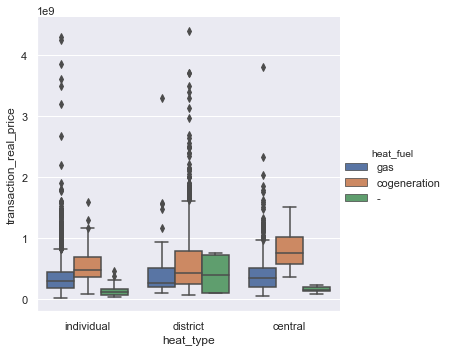

In [217]:
sns.catplot(x="heat_type", y="transaction_real_price", hue="heat_fuel", kind="box", data=train.sample(n=10000));

In [218]:
len(list(set(train['address_by_law'])))

377

In [219]:
train.isnull().sum()


key                                       0
apartment_id                              0
city                                      0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        91813
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 9
lowest_building_in_sites                  9
heat_type                              2017
heat_fuel                              9667
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              691
bathroom_count                          691
front_door_structure                  13892
transaction_real_price          

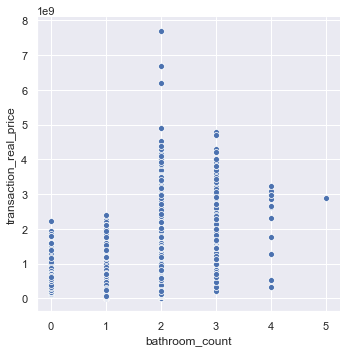

In [220]:
sns.relplot(x="bathroom_count", y="transaction_real_price",data=train.sample(n=100000));

address and price

In [221]:
train['address_by_law']

addr = list(train['address_by_law'])
cnt = 0
for i in tqdm(addr):
    district = int(str(address_by_law_lookup[i])[2:5])
    street = int(str(address_by_law_lookup[i])[5:8])
    _ = int(str(address_by_law_lookup[i])[8:10])
    addr[cnt] = [district,street,_]
    cnt +=1

100%|██████████| 1601458/1601458 [00:22<00:00, 71106.85it/s]


In [222]:
addr = pd.DataFrame(addr, columns=['district', 'street', 'addrnum'])
train = pd.concat([train, addr], axis=1)
train.head(5)

,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,...,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,tdate,district,street,addrnum
0,0,5584,1,1999,47.43,6,37.585965,127.000231,5,163.0,...,65.63,46,1.0,1.0,corridor,215000000,0,110,171,0
1,1,5584,1,1999,44.37,8,37.585965,127.000231,5,163.0,...,61.39,10,2.0,1.0,corridor,200000000,0,110,171,0
2,2,5059,1,1992,54.70,8,37.580511,127.014016,6,902.0,...,72.36,201,2.0,1.0,corridor,168000000,0,110,174,0
3,3,2816,1,1993,64.66,11,37.580324,127.011788,6,902.0,...,87.30,284,2.0,1.0,corridor,165000000,0,110,174,0
4,4,2816,1,1993,106.62,7,37.580324,127.011788,6,902.0,...,127.74,112,4.0,2.0,stairway,280000000,0,110,174,0


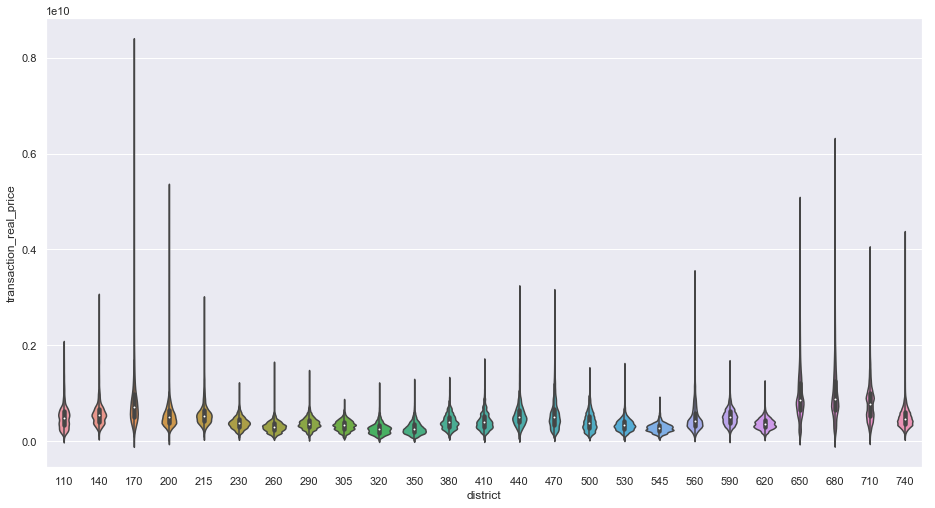

In [238]:
#seoul 
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.violinplot(x=train[train.city==1].district, y=train[train.city==1].transaction_real_price)

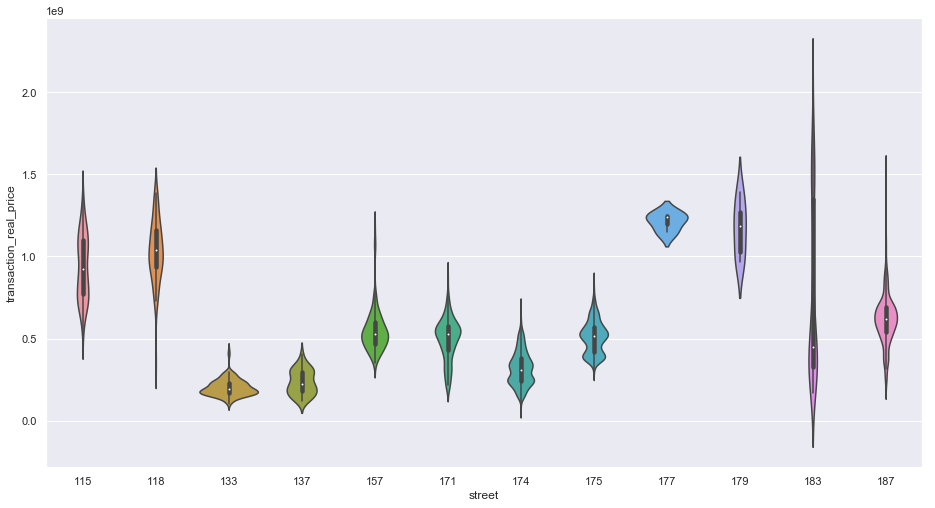

In [239]:
d = 110 
seoul = train[train.city == 1]

sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.violinplot(x=seoul[seoul.district == d].street, y=seoul[seoul.district == d].transaction_real_price)

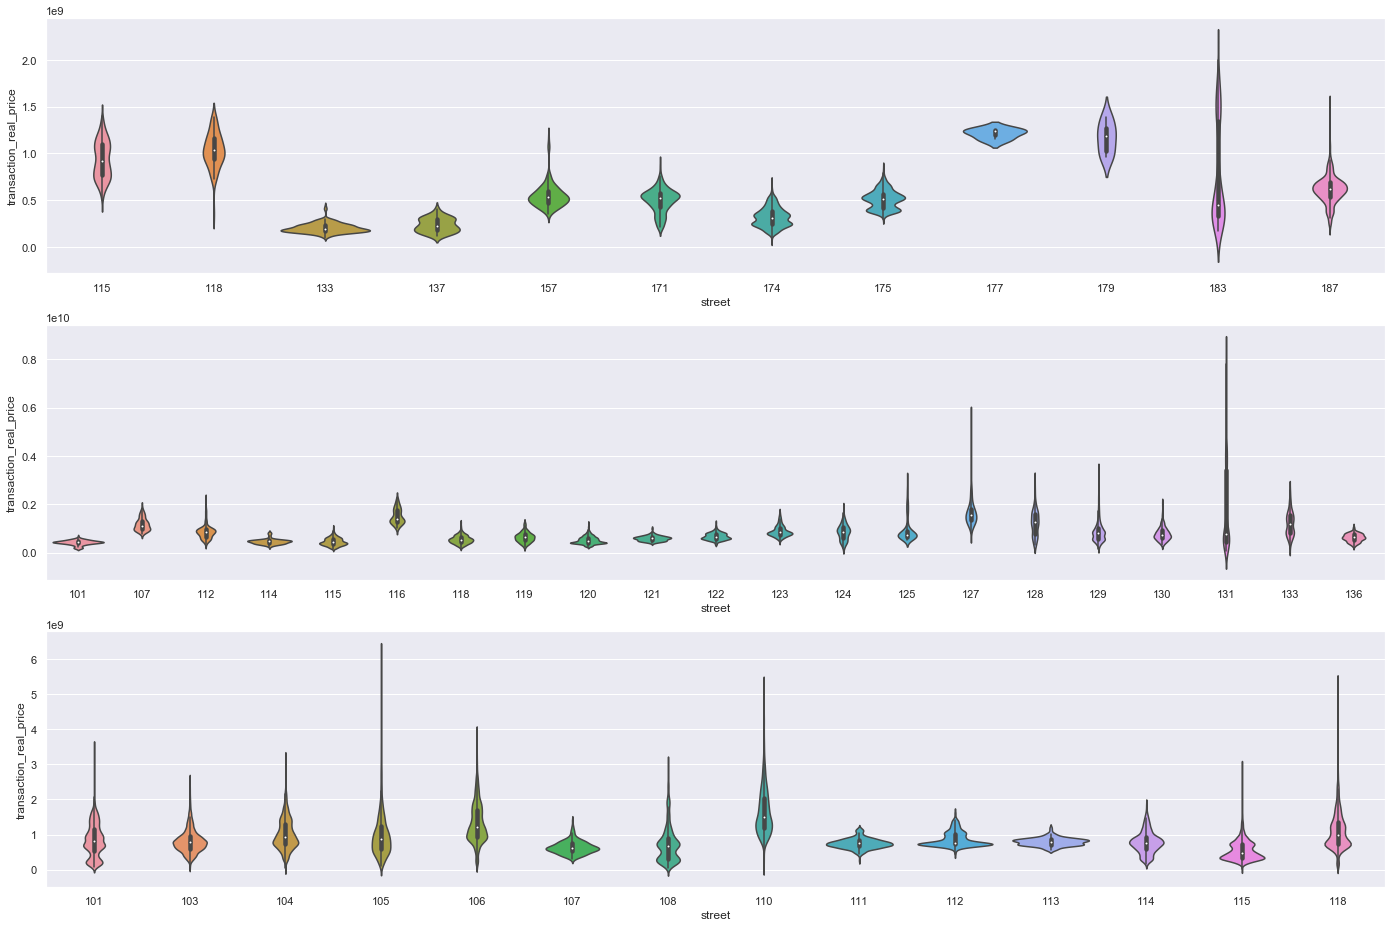

In [247]:
fig = plt.figure(figsize=(24, 16))
ax1 = fig.add_subplot(3, 1, 1)
ax1 = sns.violinplot(x=seoul[seoul.district == 110].street, y=seoul[seoul.district == 110].transaction_real_price)
ax2 = fig.add_subplot(3, 1, 2)
ax2 = sns.violinplot(x=seoul[seoul.district == 170].street, y=seoul[seoul.district == 170].transaction_real_price)
ax3 = fig.add_subplot(3, 1, 3)
ax3 = sns.violinplot(x=seoul[seoul.district == 680].street, y=seoul[seoul.district == 680].transaction_real_price)
plt.show()

In [259]:
print(len(list(set(train['address_by_law']))),len(list(set(test['address_by_law']))))

377 379


As you can see above test data has more address_by_law. While the variable is categorical, I should find the way to handle this issue

front door structure

In [9]:
train['front_door_structure'].isnull().sum()

13892

In [136]:
train[train.front_door_structure.isnull() == True][['apartment_id','latitude','longitude']].head()

,apartment_id,latitude,longitude
249,5863,37.617206,127.022105
453,4047,37.544449,126.944870
501,4331,37.463279,126.909446
509,4331,37.463279,126.909446
521,4321,37.502559,126.891951


### Schools

In [28]:
school.head()

,school_code,latitude,longitude,school_class,operation_type,highschool_type,gender,foundation_date,address_by_law
0,S000003511,37.490880,127.015082,elementary,national,NaN,both,1953.1.31,1165010800
1,S000003563,37.577782,127.002915,elementary,national,NaN,both,1946.8.22,1111016800
2,S010000737,37.481366,127.059055,elementary,public,NaN,both,1982.9.20,1168010300
3,S010000738,37.485744,127.058002,elementary,public,NaN,both,1987.11.17,1168010300
4,S010000741,37.480805,127.051891,elementary,public,NaN,both,1983.11.30,1168010300


In [29]:
tmp = train[['latitude','longitude','exclusive_use_area','transaction_real_price']]
tmp.head()

,latitude,longitude,exclusive_use_area,transaction_real_price
0,37.585965,127.000231,47.43,215000000
1,37.585965,127.000231,44.37,200000000
2,37.580511,127.014016,54.70,168000000
3,37.580324,127.011788,64.66,165000000
4,37.580324,127.011788,106.62,280000000


Will the price of the house be higher if the school is nearby?

In [30]:
tmp = np.asarray(tmp[['latitude','longitude']])
tmp1 = np.asarray(school[['latitude','longitude','school_code']])

In [49]:
from math import cos, asin, sqrt
def l2(a,b):
    lon1, lat1=a[0],a[1]
    lon2, lat2 = b[0],b[1]
    # haversine formula 
    p = 0.017453292519943295     #Pi/180
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a))

In [32]:
arr = [tmp,tmp1]
j = arr[1][0]
j[:2]

array([37.49087951, 127.0150822], dtype=object)

In [35]:
aptids = list(set(train['apartment_id']))

In [55]:
train[train.apartment_id == aptids[0]][:1][['latitude','longitude']].values[0]

array([  37.5176488,  127.012646 ])

In [60]:
schools = []
from tqdm import tqdm

for i in tqdm(aptids):
    t = []
    pair = train[train.apartment_id == i][:1][['latitude','longitude']].values[0]
    for j in tmp1:
        if(l2(pair,[j[0],j[1]]) < 3):
            t.append(j[2])
    schools.append(t)
        


100%|██████████| 3906/3906 [00:39<00:00, 99.19it/s] 


In [61]:
len(schools)

3906

In [62]:
for i in range(0,3906):
    print(aptids[i],len(schools[i]))

3 67
4 78
5 79
16392 66
24591 80
24592 82
16401 95
24 54
26 73
30 64
31 66
32 62
33 63
34 63
35 28
40 80
42 85
43 59
44 94
46 24
47 104
48 54
50 26
51 97
52 60
53 121
54 67
55 101
56 99
24631 89
61 31
62 56
63 88
64 65
65 46
68 22
16452 7
16456 22
73 124
74 76
16459 58
79 55
80 54
81 88
86 69
87 63
17928 106
90 79
91 77
92 86
16476 105
16477 98
17929 122
17930 94
100 57
17931 85
24688 13
113 61
116 66
118 64
119 66
120 92
121 106
122 66
16506 102
124 86
125 69
127 74
128 74
129 95
130 100
16518 35
135 54
136 78
137 69
138 84
139 77
142 88
143 82
144 130
146 87
147 107
151 56
8343 40
8345 39
152 65
153 63
154 83
158 52
16546 101
166 71
167 9
168 59
171 94
176 74
184 130
185 81
186 26
187 139
191 88
192 34
193 79
194 84
195 84
196 94
197 67
24774 57
17949 95
200 64
201 82
202 111
203 81
204 90
205 64
206 70
20197 27
208 98
24782 21
210 26
8403 58
211 94
213 26
214 100
215 101
8406 62
217 31
219 67
223 65
224 68
225 67
17955 83
227 81
228 87
230 85
231 116
233 26
234 99
237 23
240 47
241 

18704 120
10513 69
18700 67
10515 85
19999 31
18721 70
18722 58
18723 103
10533 52
18725 87
18727 112
10536 90
18729 38
18728 48
18730 42
18732 39
2349 45
2350 29
2351 45
10542 92
18735 30
18731 43
18736 41
18733 41
18734 41
18742 69
18738 39
18744 67
10553 36
18746 56
10555 96
10556 26
10557 68
18747 55
18745 76
18751 55
10561 45
18754 39
18748 67
10567 83
10569 57
10581 71
18774 89
18779 64
26975 89
10591 91
26979 41
2405 81
18790 100
26984 54
10607 126
10608 128
10609 81
36301 47
18803 101
18805 81
18806 71
10627 78
2436 69
2437 66
10635 82
10636 106
27021 72
18827 52
27023 52
18839 86
2457 101
2458 68
27033 62
11886 89
11887 87
10656 66
18852 79
18857 91
2487 90
2488 89
2489 87
2490 88
2491 85
2492 82
2493 81
2494 89
10679 67
18872 46
18912 66
2537 65
18944 112
18949 70
18951 67
18952 99
2573 80
2575 88
2576 81
18960 57
18963 109
10776 84
10777 85
10778 88
10779 84
18971 91
18977 56
18979 69
2598 87
2599 93
2600 90
2601 80
18989 88
36339 74
18993 107
18996 110
2615 92
2616 87
2617 

12473 69
4281 80
4286 67
12480 104
12481 102
12482 96
12483 86
12485 110
12487 102
12488 98
4297 76
4298 56
4299 136
4300 103
12490 104
12493 80
4303 65
4305 82
4306 110
4307 75
4308 115
4310 94
37079 125
37081 75
37084 40
37088 63
4321 93
4323 91
4325 104
37093 51
4328 98
20713 55
4329 94
4331 82
4332 91
4333 63
20712 54
4335 79
4330 57
37096 50
4338 89
4340 107
4342 95
4343 85
4344 124
4346 64
4347 77
4348 132
12538 63
4350 63
4351 81
37120 77
4353 90
4354 89
4355 72
4356 98
4357 87
4358 84
4359 65
4360 90
12551 99
12550 104
4363 86
4364 88
4366 88
4367 105
4368 115
12559 106
4371 125
4373 89
4374 99
4377 90
4378 105
4379 101
20761 80
4382 79
12574 77
4384 93
4385 65
4386 104
12578 82
4388 139
4389 136
12582 71
20775 78
4392 99
4393 91
20777 33
4396 79
4397 86
4398 93
4399 93
4400 91
4401 100
4402 104
20784 28
20786 33
4405 107
37171 65
37175 109
37173 90
37177 36
37174 72
37172 102
37176 23
4413 94
37181 91
4415 86
4417 69
4421 84
4422 93
12615 84
4424 97
4427 99
4429 85
4431 98
126

15224 91
15232 26
23424 108
15274 39
19318 128
15283 55
7110 80
22580 106
7112 78
23499 60
7116 76
7118 77
7119 59
7124 87
50264 46
7133 86
22585 45
7136 140
7137 78
7138 82
7139 109
19329 57
7141 97
19330 57
7145 67
7146 65
7147 66
7148 82
22587 72
23529 46
7153 63
7154 45
7155 92
7158 65
15350 113
7160 92
7163 134
7165 132
19335 58
15361 51
15362 57
7170 80
7173 81
7178 83
7180 86
7185 111
3542 43
15382 89
23573 104
15386 78
23582 60
15394 56
15395 67
15396 115
19342 87
15399 82
17716 97
19345 94
19346 67
15415 48
15439 104
33272 109
15441 60
15449 77
15450 82
19353 73
15455 91
23083 65
27502 73
15492 83
27503 83
15498 101
15499 69
15502 76
15503 86
15504 113
23695 11
15507 9
23704 26
15514 119
15522 61
15524 55
15581 91
23773 120
23774 90
15592 49
15598 26
15599 30
23824 110
17763 30
15648 104
23840 117
15652 104
15653 120
15662 82
15663 66
15668 20
22654 95
22655 81
23880 27
15697 8
15700 82
7519 75
7520 90
7528 58
7541 105
7543 64
7559 73
23946 44
15755 65
7566 91
7568 85
7579 127

show only high schools

In [71]:
school[school['highschool_type'].isnull() == False].head()

,school_code,latitude,longitude,school_class,operation_type,highschool_type,gender,foundation_date,address_by_law
815,S010000387,37.609801,127.001431,high,private,general,male,1968.3.11,1129013300
816,S010000388,37.508977,126.851306,high,public,autonomous,both,1984.12.15,1153010600
817,S010000389,37.568595,126.805649,high,public,general,both,1982.11.30,1150010900
818,S010000390,37.521446,126.882951,high,public,general,both,1955.4.27,1156012600
819,S010000391,37.541281,127.102041,high,public,general,both,1986.1.25,1121510400


In [5]:
all_ = train.append(test)

In [14]:
print(all_['transaction_real_price'].max())

8200000000


### Subway 

In [119]:
subway.head()

,station_id,latitude,longitude,subway_line,address_by_law
0,1,37.555729,126.972145,"1,4,KJ,AP",1.114012e+09
1,2,37.565624,126.976936,"1,2",1.114017e+09
2,3,37.570169,126.983099,1,1.111013e+09
3,4,37.571570,126.991895,"1,3,5",1.111016e+09
4,5,37.570988,127.001921,1,1.111016e+09


In [120]:
subline = list(subway['subway_line'])
for i in range(0,405):
    t = subline[i].split(',')
    subline[i] = t

In [121]:
subline[:5]

[['1', '4', 'KJ', 'AP'], ['1', '2'], ['1'], ['1', '3', '5'], ['1']]

In [126]:
subway['address_by_law'] = subway['address_by_law'].astype('int64')
subway['address_by_law'].head()

0    1114012000
1    1114016700
2    1111012600
3    1111015600
4    1111016300
Name: address_by_law, dtype: int64

In [127]:
train['address_by_law'].head()

0    1111017100
1    1111017100
2    1111017400
3    1111017400
4    1111017400
Name: address_by_law, dtype: int64

In [128]:
aptids = list(set(train['apartment_id']))
is_subway = []
from tqdm import tqdm

for i in tqdm(aptids):
    t = []
    apt_add = train[train.apartment_id == i][:1][['address_by_law']].values[0]
    for j in list(subway['address_by_law']):
        if(apt_add == j):
            t.append(j)
    is_subway.append(t)

100%|██████████| 3906/3906 [00:20<00:00, 187.64it/s]


In [133]:
# aptids[i],len(is_subway[i])

train[train.apartment_id == aptids[4]]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
1066999,1067006,24591,1,201505,11~20,2014,38.770,7,37.525058,126.899403,...,9.0,individual,gas,57900,57.04,18,2.0,1.0,stairway,322000000
1067000,1067007,24591,1,201505,11~20,2014,38.770,7,37.525058,126.899403,...,9.0,individual,gas,57901,57.04,18,2.0,1.0,stairway,322000000
1100533,1100540,24591,1,201507,11~20,2014,38.770,19,37.525058,126.899403,...,9.0,individual,gas,57900,57.04,18,2.0,1.0,stairway,350000000
1100534,1100541,24591,1,201507,11~20,2014,38.770,19,37.525058,126.899403,...,9.0,individual,gas,57901,57.04,18,2.0,1.0,stairway,350000000
1100536,1100543,24591,1,201507,11~20,2014,38.770,16,37.525058,126.899403,...,9.0,individual,gas,57900,57.04,18,2.0,1.0,stairway,360000000
1100537,1100544,24591,1,201507,11~20,2014,38.770,16,37.525058,126.899403,...,9.0,individual,gas,57901,57.04,18,2.0,1.0,stairway,360000000
1106659,1106666,24591,1,201507,1~10,2014,38.770,3,37.525058,126.899403,...,9.0,individual,gas,57900,57.04,18,2.0,1.0,stairway,320000000
1106660,1106667,24591,1,201507,1~10,2014,38.770,3,37.525058,126.899403,...,9.0,individual,gas,57901,57.04,18,2.0,1.0,stairway,320000000
1125792,1125799,24591,1,201508,21~31,2014,42.470,5,37.525058,126.899403,...,9.0,individual,gas,57907,62.00,12,2.0,1.0,stairway,380000000
1128054,1128061,24591,1,201508,21~31,2014,40.136,4,37.525058,126.899403,...,9.0,individual,gas,57903,58.94,15,2.0,1.0,stairway,340000000
